<a href="https://colab.research.google.com/github/MergenTeT/CNN-Model-Training/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train)

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape


((45000, 28, 28),
 (45000,),
 (10000, 28, 28),
 (10000,),
 (15000, 28, 28),
 (15000,))

In [23]:
from keras.utils.np_utils import to_categorical
import numpy as np


In [24]:
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train.astype('float32')/255
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test.astype('float32')/255
x_validation = x_validation.reshape([-1,28,28,1])
x_validation = x_validation.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validation = to_categorical(y_validation)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape

((45000, 28, 28, 1),
 (45000, 10),
 (10000, 28, 28, 1),
 (10000, 10),
 (15000, 28, 28, 1),
 (15000, 10))

In [26]:
from keras import layers,models

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)         

In [35]:
import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss ='categorical_crossentropy', optimizer=opt,metrics =['accuracy'])

In [36]:
history = model.fit(x_train,y_train,epochs = 20,batch_size = 256,validation_data = (x_validation,y_validation))

Epoch 1/20
176/176 [==============================] - 54s 300ms/step - loss: 0.9105 - accuracy: 0.6569 - val_loss: 0.5600 - val_accuracy: 0.7863
Epoch 2/20
176/176 [==============================] - 52s 296ms/step - loss: 0.6311 - accuracy: 0.7694 - val_loss: 0.4791 - val_accuracy: 0.8277
Epoch 3/20
176/176 [==============================] - 51s 288ms/step - loss: 0.5752 - accuracy: 0.7896 - val_loss: 0.4491 - val_accuracy: 0.8395
Epoch 4/20
176/176 [==============================] - 49s 278ms/step - loss: 0.5506 - accuracy: 0.8035 - val_loss: 0.4340 - val_accuracy: 0.8305
Epoch 5/20
176/176 [==============================] - 50s 285ms/step - loss: 0.5354 - accuracy: 0.8083 - val_loss: 0.4214 - val_accuracy: 0.8389
Epoch 6/20
176/176 [==============================] - 50s 282ms/step - loss: 0.5189 - accuracy: 0.8140 - val_loss: 0.4005 - val_accuracy: 0.8475
Epoch 7/20
176/176 [==============================] - 50s 284ms/step - loss: 0.5072 - accuracy: 0.8176 - val_loss: 0.3976 - val_ac

In [37]:
test_loss,test_acc = model.evaluate(x_test,y_test)
test_loss,test_acc


313/313 [==============================] - 4s 11ms/step - loss: 0.4010 - accuracy: 0.8469


(0.40099382400512695, 0.8468999862670898)

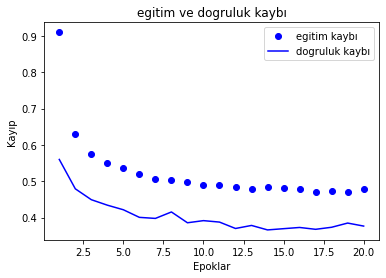

In [38]:
import matplotlib.pyplot as plt


hist=history.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label = 'egitim kaybı')
plt.plot(epochs,val_loss_values,'b',label = 'dogruluk kaybı')
plt.title('egitim ve dogruluk kaybı')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [ ]:
history.history

{'loss': [0.7452406287193298,
  0.44860565662384033,
  0.378048300743103,
  0.3365492820739746,
  0.31157878041267395],
 'acc': [0.7299333214759827,
  0.8373777866363525,
  0.8644000291824341,
  0.8778666853904724,
  0.8857777714729309],
 'val_loss': [0.459101140499115,
  0.4078230857849121,
  0.34971123933792114,
  0.3214976489543915,
  0.28261715173721313],
 'val_acc': [0.834933340549469,
  0.8508666753768921,
  0.8705333471298218,
  0.8826666474342346,
  0.8948666453361511]}